## Different imports and setup

In [1]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tqdm.keras import TqdmCallback

In [3]:
# Custom plots file and tensorflow models
from Tools import Plot
from Tools import Custom_models

In [4]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('Not working on GPU !')
else:
  print('Found GPU at: {}'.format(device_name))

Not working on GPU !


In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Set the seeds and extract the training data

In [6]:
# Set the seed for reproducibility
seed = 6
np.random.seed(seed)
tf.random.set_seed(seed*2)

In [7]:
# Extract data
data = np.loadtxt('Data/tanh_2D.txt')
features = data[:,0:2]
labels = data[:,2]

In [8]:
# Separate data into training and testing sets (keeping 10% in the test set)
N = len(features)
stop = round(0.9*N)
perm = np.random.permutation(N)
features_training = features[perm[0:stop]]
features_testing = features[perm[stop:N]]
labels_training = labels[perm[0:stop]]
labels_testing = labels[perm[stop:N]]

In [9]:
print(f'We will be training on {len(features_training)} examples !')
print(f'And testing on {len(features_testing)} examples !')

We will be training on 90000 examples !
And testing on 10000 examples !


## Create and train the model

In [10]:
# Create the model
learning_rate = 1e-3
K = 1024
K_out = 1
name = 'model_2D'

opt = Adam(learning_rate=learning_rate)

model = Custom_models.Model_2D(K1=K, K2=K, K_output=K_out, name=name)
model.compile(loss=MeanSquaredError(), optimizer=opt)

In [11]:
# Train
N_epochs = 200

history = model.fit(features_training, labels_training, epochs=N_epochs, validation_split=0.1, verbose=0,
                    shuffle=True, initial_epoch=0, callbacks=[TqdmCallback()])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2021-10-14 11:49:26.661967: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-14 11:49:26.662756: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## Check the efficiency of training

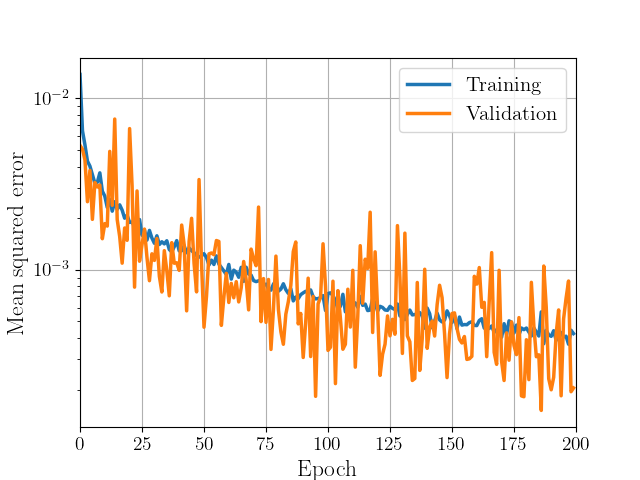

In [13]:
filename = 'Figures/2D_training_error.pdf'
save = False

plt.figure()
plt.semilogy(history.epoch, np.array(history.history['loss']), label='Training')
plt.semilogy(history.epoch, np.array(history.history['val_loss']), label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean squared error')
plt.xlim([0,200])
plt.legend()
plt.grid()
plt.show()
if (save):
    plt.savefig(filename, bbox_inches='tight')

## Save the model

In [14]:
# Save the model
model_name = 'Saved_models/Model_2D'
save_model = False

if (save_model):
    model.save(model_name)

INFO:tensorflow:Assets written to: Saved_models/Model_2D/assets


2021-10-14 12:29:21.351793: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


## Check the results on the test set

In [17]:
prediction = model.predict(features_testing)
prediction = np.ravel(prediction)

mse = tf.keras.losses.MeanSquaredError()
MSE = mse(labels_testing, prediction)

mae = tf.keras.losses.MeanAbsoluteError()
MAE = mae(labels_testing, prediction)

print(f'The MSE on the test set is : {MSE:.4e}')
print(f'The MAE on the test set is : {MAE:.4e}')

The MSE on the test set is : 1.9925e-04
The MAE on the test set is : 4.1980e-03


## Check the result on a grid

In [75]:
x = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x, x)

In [76]:
# Creates coordinates vector from the grid
coordinates = np.vstack([X.ravel(), Y.ravel()]).T
pred = model.predict(coordinates).ravel()

# Re-transform the result as a matrix for use in color plot
Z_pred = pred.reshape(len(x), len(x))

# True function
center = [1/2, 1/2] 
r = 1/5          
k = 100
Z_true = 1/2*(1 + np.tanh(-k*(np.sqrt((X-center[0])**2 + (Y-center[1])**2) - r)))

[None]

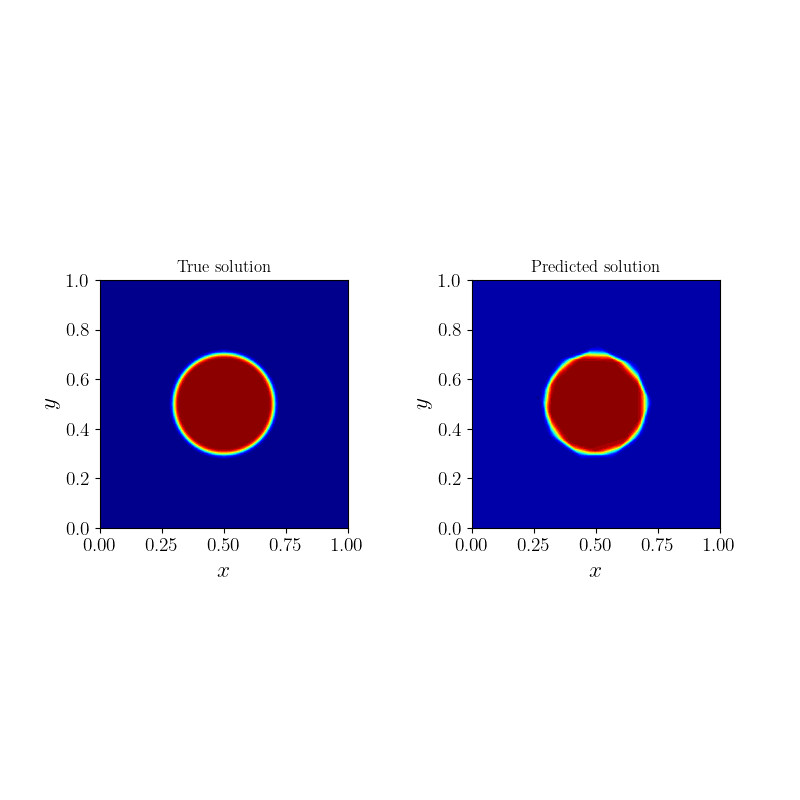

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
plt.subplots_adjust(wspace=0.5)

fig1 = ax1.contourf(X, Y, Z_true, levels=40, cmap='jet')
ax1.set_title('True solution')
ax1.set(xlabel='$x$', ylabel='$y$')
ax1.set(aspect='equal')
#plt.colorbar(fig1,ax=ax1)

fig2 = ax2.contourf(X, Y, Z_pred, levels=40, cmap='jet')
ax2.set_title('Predicted solution')
ax2.set(xlabel='$x$', ylabel='$y$')
ax2.set(aspect='equal')
#plt.colorbar(fig2,ax=ax2)